In [3]:
from numpy import *
import matplotlib.pyplot as plt
from qiskit import *
from qiskit.aqua.circuits import FourierTransformCircuits as ftc

In [4]:
def qft_dagger(circ, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(int(n/2)):
        circ.swap(qubit, n-qubit-1)
    for j in range(n,0,-1):
        k = n - j
        for m in range(k):
            circ.cu1(-pi/float(2**(k-m)), n-m-1, n-k-1)
        circ.h(n-k-1)

In [5]:
def qft(circ, n):
    """n-qubit QFT on the qubits in circ."""
    for j in range(n):
        circ.h(j)
        for k in range(j+1,n):
            circ.cu1(pi/float(2**(k-j)), k, j)
        circ.barrier()
    swap_registers(circ, n)

In [6]:
def qft1 (circuit,qr,swap=True):
    n=qr.size
    i=n-1
    j=0
    while i>=0:
        circuit.barrier()
        circuit.h(qr[i])
        j=i
        k=2
        while j>0:
            circuit.cu1(2*pi/(2**k),qr[i],qr[j-1])
            j-=1
            k+=1
            
        i-=1
    
    if(swap):
        i=0
        j=n-1
        while i<(n//2):
            circuit.swap(qr[i],qr[j])
            i+=1
            j-=1
            
    circuit.barrier()
    return  circuit

In [7]:
def qft_inv (circuit,qr,swap=True):
    n=qr.size
    i=0
    j=0
    while i<n:
      
        k=2
        j=0
        circuit.barrier()
        while j<i:
            circuit.cu1(2*pi/(2**k),qr[i],qr[j])
            k+=1
            j+=1
        circuit.h(qr[i])
        i+=1
    circuit.barrier()
    if(swap):
        i=0
        j=n-1
        while i<(n//2):
            circuit.swap(qr[i],qr[j])
            i+=1
            j-=1
            
    circuit.barrier()
    return  circuit

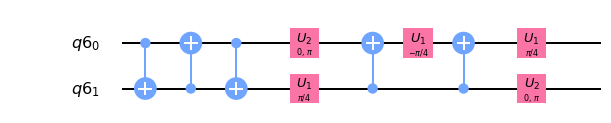

In [14]:
qreg = QuantumRegister(2)
qc = QuantumCircuit(qreg)
ftc.construct_circuit(qc,qreg)
qc.draw(output='mpl')